#### Roll Number : 2022102039
#### Name : Meet Gera

#### Question 1

In [96]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder



In [97]:
class Data:
    def __init__(self):
        self.data = None

    def load_data(self, file_path):
        self.data = pd.read_csv(file_path)

    def encode_categorical(self):
        if self.data is not None:
            for col in self.data.select_dtypes(include=['object']):
                le = LabelEncoder()
                self.data[col] = le.fit_transform(self.data[col].astype(str))

    def handle_missing(self, strategy='most_frequent'):
        if self.data is not None:
            for col in self.data.columns:
                if strategy == 'most_frequent':
                    # Find the most frequent value in the column
                    fill_value = self.data[col].mode()[0]
                elif strategy == 'mean':
                    # Compute the mean of the column (for numerical data)
                    fill_value = self.data[col].mean()
                elif strategy == 'median':
                    # Compute the median of the column (for numerical data)
                    fill_value = self.data[col].median()
                elif strategy == 'constant':
                    # Set a constant fill value (can be modified)
                    fill_value = 0
                else:
                    raise ValueError("Invalid strategy. Choose from 'most_frequent', 'mean', 'median', or 'constant'.")

                # Fill missing values in the column
                self.data[col].fillna(fill_value, inplace=True)
   

    def list_features(self):
        if self.data is not None:
            return self.data.columns.tolist()
        else:
            return []
        
    def display_data_with_dummies(self):
        if self.data is not None:
            display(pd.get_dummies(self.data))

    def plot_feature(self, feature, plot_type='histogram'):
        if self.data is not None and feature in self.data.columns:
            if plot_type == 'histogram':
                self.data[feature].hist(figsize=(6, 4))
                plt.title(f"Histogram for {feature}")
            elif plot_type == 'boxplot':
                self.data[feature].plot(kind='box', figsize=(6, 4))
                plt.title(f"Boxplot for {feature}")
            elif plot_type == 'violinplot':
                sns.violinplot(y=self.data[feature])
                plt.title(f"Violin Plot for {feature}")
            else:
                print(f"Plot type {plot_type} is not supported.")
            plt.show()

    def split_data(self, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
        if self.data is not None:
            train_temp, test = train_test_split(self.data, test_size=test_size, random_state=random_state)
            val_portion = val_size / (train_size + val_size)
            train, val = train_test_split(train_temp, test_size=val_portion, random_state=random_state)
            train, val , test = np.array(train), np.array(val), np.array(test)
            return train, val, test

/var/folders/sc/2gy2r1nj7_l7l696dz517r280000gn/T/ipykernel_23050/1740946961.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[col].fillna(fill_value, inplace=True)
/var/folders/sc/2gy2r1nj7_l7l696dz517r280000gn/T/ipykernel_23050/1740946961.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

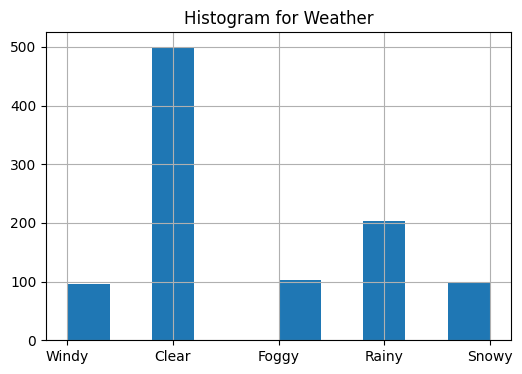

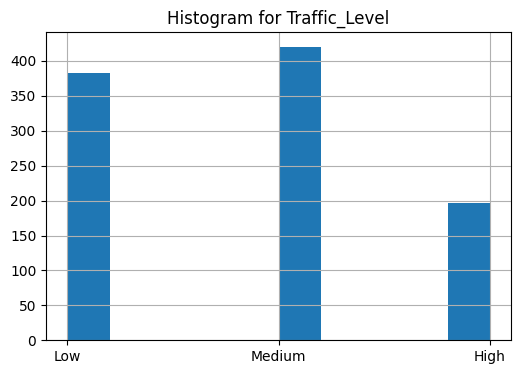

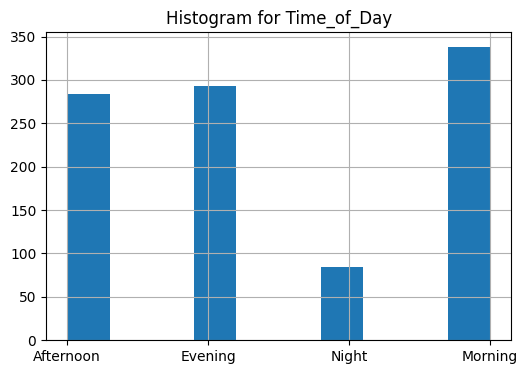

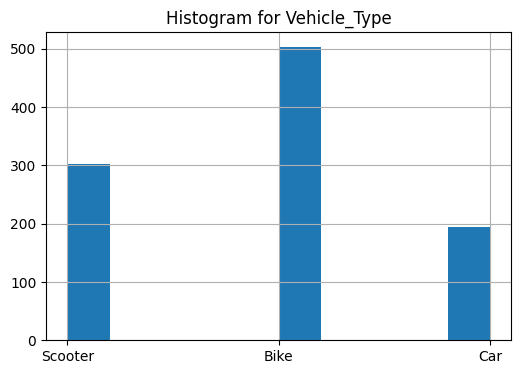

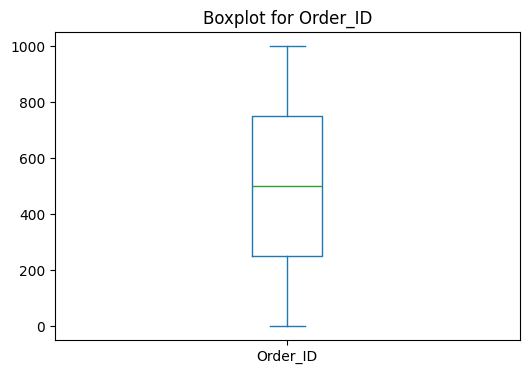

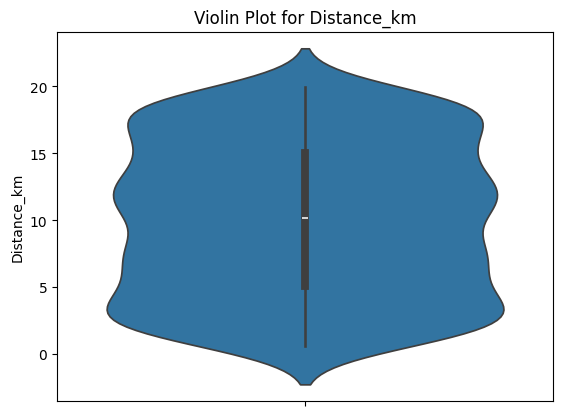

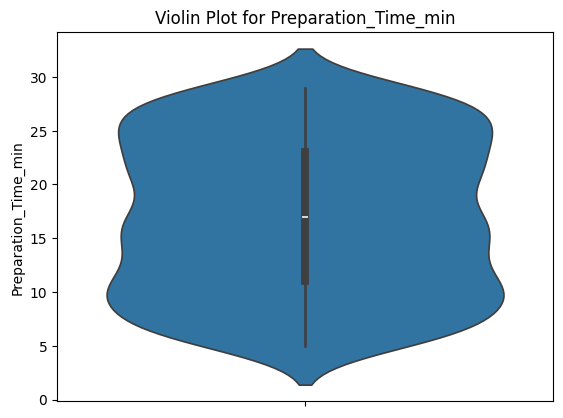

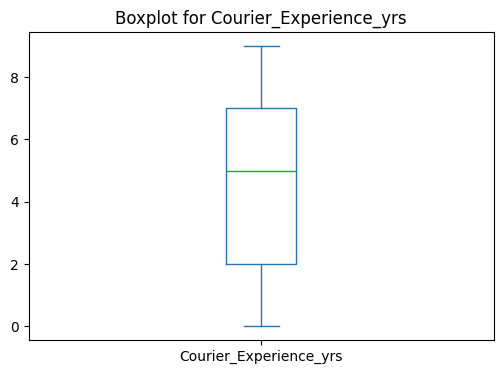

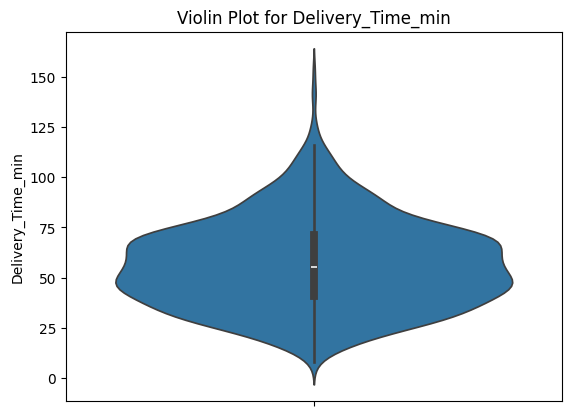

In [98]:
data_obj = Data()

data_obj.load_data('Food_Delivery_Times.csv')


data_obj.handle_missing(strategy='most_frequent')
# data_obj.display_data_with_dummies()
# Plotting these before encoding categorical data
data_obj.plot_feature("Weather", plot_type = "histogram")
data_obj.plot_feature("Traffic_Level", plot_type = "histogram")
data_obj.plot_feature("Time_of_Day", plot_type = "histogram")
data_obj.plot_feature("Vehicle_Type", plot_type = "histogram")
data_obj.encode_categorical()
# features = data_obj.list_features()
# print(features)
data_obj.plot_feature('Order_ID', plot_type='boxplot')
data_obj.plot_feature('Distance_km', plot_type='violinplot')
data_obj.plot_feature("Preparation_Time_min", plot_type = "violinplot")
data_obj.plot_feature("Courier_Experience_yrs", plot_type = "boxplot")
data_obj.plot_feature("Delivery_Time_min", plot_type = "violinplot")

# Splitting data into ttain, validation and test sets
train, val, test = data_obj.split_data()



In [99]:
class LinearRegression:
    def __init__(self, lr=0.05, iterations=1000, init='random', batch_size=32):
        self.lr = lr
        self.iterations = iterations
        self.init = init
        self.batch_size = batch_size
        self.w = None
        self.b = None

    def _init_params(self, n_features):
        if self.init == 'zero':
            self.w = np.zeros(n_features).reshape(n_features,1)
            self.b = 0.0
        else:
            self.w = np.random.randn(n_features).reshape(n_features,1)
            self.b = np.random.randn()

    def _compute_mse(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)

    def _compute_r2(self, y, y_hat):
        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

    def _predict(self, X):
        return np.dot(X, self.w) + self.b

    def fit_batch(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self._init_params(n_features)

        train_mse_history = []
        val_mse_history = []

        for i in range(self.iterations):
            
            y_pred = self._predict(X)

            dw = -(2/n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2/n_samples) * np.sum(y - y_pred)

        
            self.w -= self.lr * dw
            self.b -= self.lr * db

            mse_train = self._compute_mse(y, y_pred)
            train_mse_history.append(mse_train)

            if X_val is not None and y_val is not None and i % 10 == 0:
                y_val_pred = self._predict(X_val)
                mse_val = self._compute_mse(y_val, y_val_pred)
                val_mse_history.append(mse_val)

        return train_mse_history, val_mse_history

    def fit_mini_batch(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self._init_params(n_features)

        train_mse_history = []
        val_mse_history = []


        prev_mse_error = float('-inf')
        for i in range(self.iterations):
            # Shuffle data
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                y_pred = self._predict(X_batch)
                dw = -(2/len(X_batch)) * np.dot(X_batch.T, (y_batch - y_pred))
                db = -(2/len(X_batch)) * np.sum(y_batch - y_pred)

                self.w = self.w - self.lr * dw
                self.b = self.b - self.lr * db

            # Compute train MSE after one epoch
            y_pred_full = self._predict(X)
            mse_train = self._compute_mse(y, y_pred_full)
            train_mse_history.append(mse_train)

            if abs(mse_train - prev_mse_error) < 1e-3:
                print("Early stopping due to convergence.")
                break
            prev_mse_error = mse_train

            if X_val is not None and y_val is not None and i % 10 == 0:
                y_val_pred = self._predict(X_val)
                mse_val = self._compute_mse(y_val, y_val_pred)
                val_mse_history.append(mse_val)

        return train_mse_history, val_mse_history

    def fit_stochastic(self, X, y, X_val=None, y_val=None, regularization=None, reg_param=0.01):
        n_samples, n_features = X.shape
        self._init_params(n_features)

        train_mse_history = []
        val_mse_history = []

        prev_mse_train = float('-inf')

        for i in range(self.iterations):
            # Shuffle data
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for idx in range(n_samples):
                X_i = X_shuffled[idx:idx+1]
                y_i = y_shuffled[idx:idx+1]

                y_pred = self._predict(X_i)
                dw = -(2) * np.dot(X_i.T, (y_i - y_pred))
                db = -(2) * np.sum(y_i - y_pred)

                if regularization == 'ridge':
                    dw += 2 * reg_param * self.w
                elif regularization == 'lasso':
                    dw += reg_param * np.sign(self.w)

                self.w = self.w - self.lr * dw
                self.b = self.b - self.lr * db

            # Compute train MSE after one epoch
            y_pred_full = self._predict(X)
            mse_train = self._compute_mse(y, y_pred_full)
            train_mse_history.append(mse_train)

            if abs(mse_train - prev_mse_train) < 1e-3:
                print("Early stopping due to convergence.")
                break
            prev_mse_train = mse_train

            if X_val is not None and y_val is not None and i % 10 == 0:
                y_val_pred = self._predict(X_val)
                mse_val = self._compute_mse(y_val, y_val_pred)
                val_mse_history.append(mse_val)

        return train_mse_history, val_mse_history

    def predict(self, X):
        return self._predict(X)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = self._compute_mse(y_test, y_pred)
        r2 = self._compute_r2(y_test, y_pred)
        return mse, r2

In [100]:
X_train = train[:,1:-1]
y_train = train[:, -1].reshape(-1, 1)

X_val = val[:, 1:-1]
y_val = val[:, -1].reshape(-1, 1)

X_test = test[:, 1:-1]
y_test = test[:, -1].reshape(-1, 1)

In [101]:
lr_model = LinearRegression(lr=0.001, iterations=200, init='random')
train_mse_hist, val_mse_hist = lr_model.fit_batch(X_train, y_train, X_val, y_val)

Final Test MSE (Batch): 153.84111438330837
Final Test R2 (Batch): 0.643813166404908


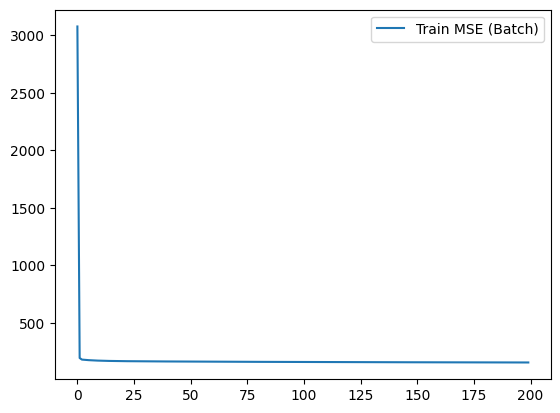

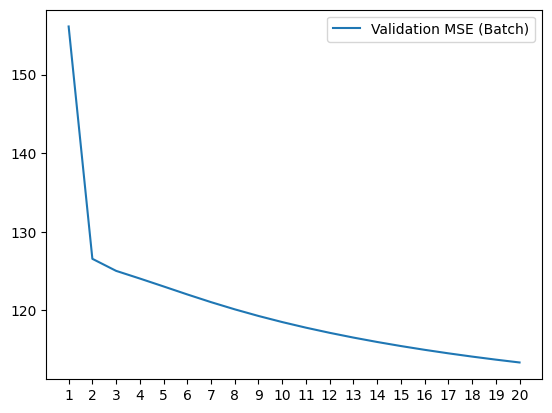

In [102]:
test_mse, test_r2 = lr_model.evaluate(X_test, y_test)

print("Final Test MSE (Batch):", test_mse)
print("Final Test R2 (Batch):", test_r2)

# Plotting train MSE
import matplotlib.pyplot as plt
plt.plot(train_mse_hist, label='Train MSE (Batch)')
plt.legend()
plt.show()

# Plotting validation MSE
plt.plot(range(1, 21), val_mse_hist, label='Validation MSE (Batch)')
plt.xticks(range(1, 21))
plt.legend()
plt.show()


In [103]:
# Mini-batch gradient descent
lr_model_mini_batch = LinearRegression(lr=0.001, iterations=200, init='random', batch_size=32)
train_mse_hist_mini_batch, val_mse_hist_mini_batch = lr_model_mini_batch.fit_mini_batch(X_train, y_train, X_val, y_val)

# Stochastic gradient descent
lr_model_stochastic = LinearRegression(lr=0.001, iterations=1000, init='random')
train_mse_hist_stochastic, val_mse_hist_stochastic = lr_model_stochastic.fit_stochastic(X_train, y_train, X_val, y_val)


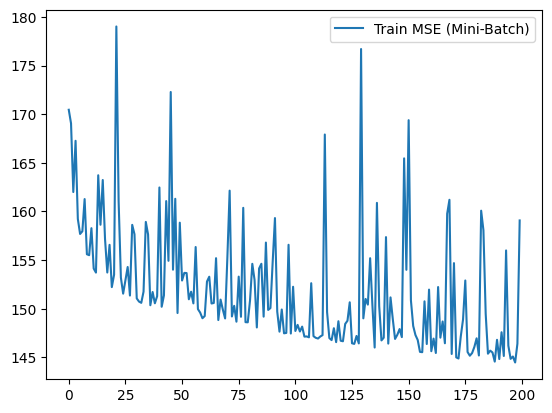

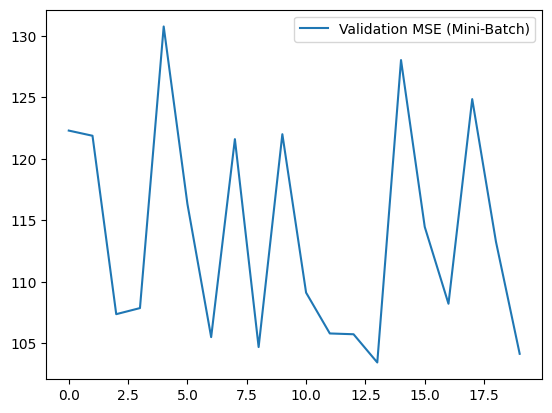

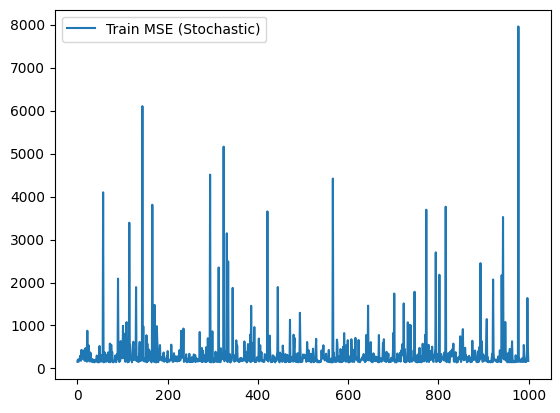

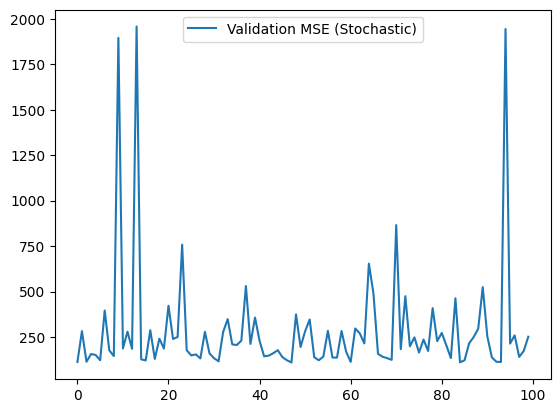

In [104]:

# Plotting train MSE for mini-batch
plt.plot(train_mse_hist_mini_batch, label='Train MSE (Mini-Batch)')
plt.legend()
plt.show()

# Plotting validation MSE for mini-batch
plt.plot( val_mse_hist_mini_batch, label='Validation MSE (Mini-Batch)')
plt.legend()
plt.show()

# Plotting train MSE for stochastic
plt.plot(train_mse_hist_stochastic, label='Train MSE (Stochastic)')
plt.legend()
plt.show()

# Plotting validation MSE for stochastic
plt.plot( val_mse_hist_stochastic, label='Validation MSE (Stochastic)')
plt.legend()
plt.show()

In [105]:
test_mse_mini_batch, test_r2_mini_batch = lr_model_mini_batch.evaluate(X_test, y_test)
print("Final Test MSE (Mini-Batch):", test_mse_mini_batch)
print("Final Test R2 (Mini-Batch):", test_r2_mini_batch)
print(min(val_mse_hist_mini_batch))

Final Test MSE (Mini-Batch): 150.35205220616564
Final Test R2 (Mini-Batch): 0.6518913580773658
103.43956362821902


In [106]:
test_mse_stochastic, test_r2_stochastic = lr_model_stochastic.evaluate(X_test, y_test)
print("Final Test MSE (Stochastic):", test_mse_stochastic)
print("Final Test R2 (Stochastic):", test_r2_stochastic)

Final Test MSE (Stochastic): 149.8843067120491
Final Test R2 (Stochastic): 0.6529743246636753


### Regularization 


Training RIDGE Regression Model...



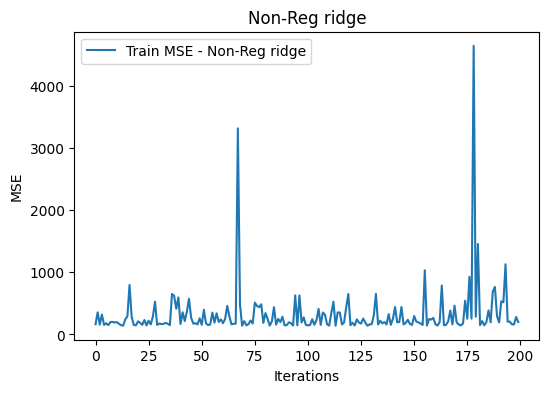

Final Test MSE (Non-Reg): 178.1509
Final Test R² (Non-Reg): 0.5875


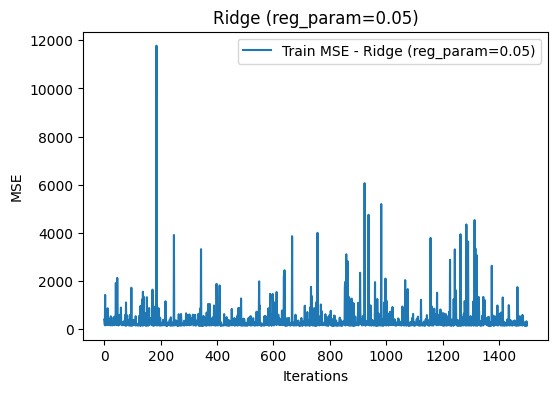

Final Test MSE (ridge (reg_param=0.05)): 141.0165
Final Test R² (ridge (reg_param=0.05)): 0.6735


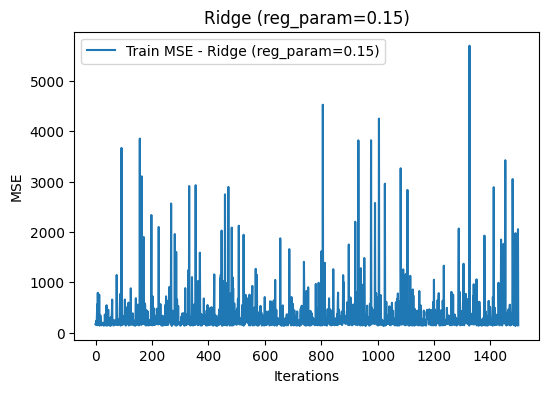

Final Test MSE (ridge (reg_param=0.15)): 137.8059
Final Test R² (ridge (reg_param=0.15)): 0.6809


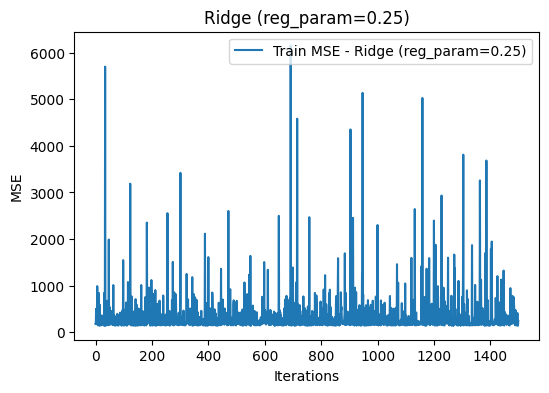

Final Test MSE (ridge (reg_param=0.25)): 223.1473
Final Test R² (ridge (reg_param=0.25)): 0.4833


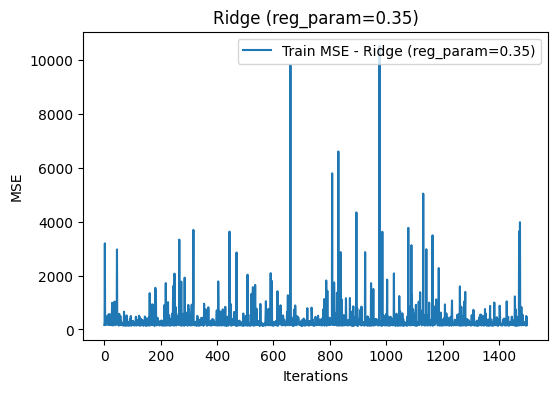

Final Test MSE (ridge (reg_param=0.35)): 153.6907
Final Test R² (ridge (reg_param=0.35)): 0.6442


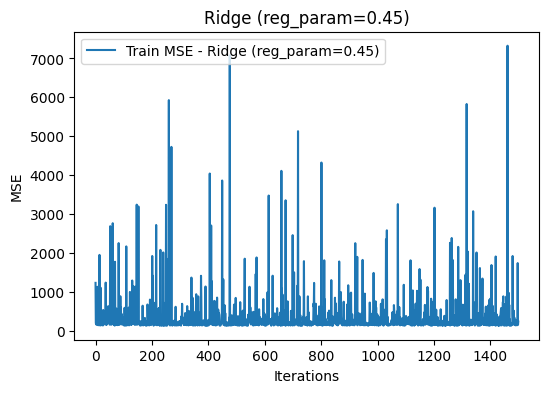

Final Test MSE (ridge (reg_param=0.45)): 216.1636
Final Test R² (ridge (reg_param=0.45)): 0.4995


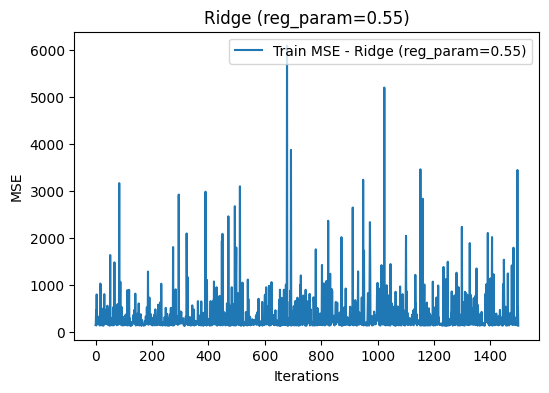

Final Test MSE (ridge (reg_param=0.55)): 126.8280
Final Test R² (ridge (reg_param=0.55)): 0.7064


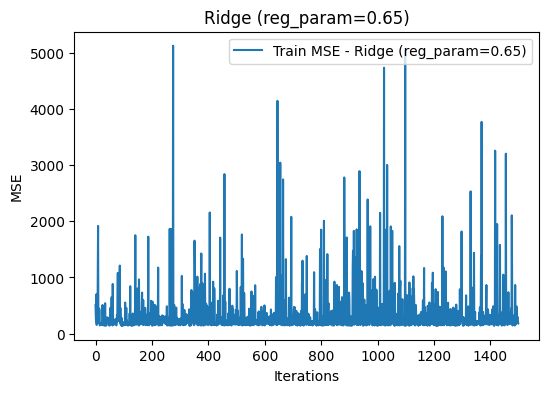

Final Test MSE (ridge (reg_param=0.65)): 166.7948
Final Test R² (ridge (reg_param=0.65)): 0.6138


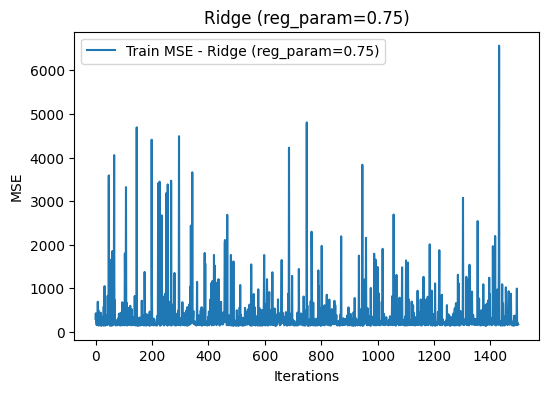

Final Test MSE (ridge (reg_param=0.75)): 155.2703
Final Test R² (ridge (reg_param=0.75)): 0.6405


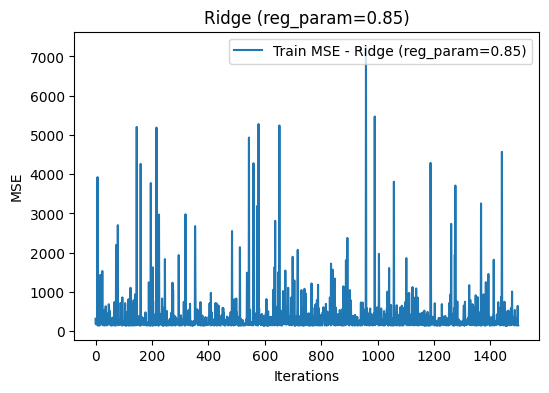

Final Test MSE (ridge (reg_param=0.85)): 139.1701
Final Test R² (ridge (reg_param=0.85)): 0.6778


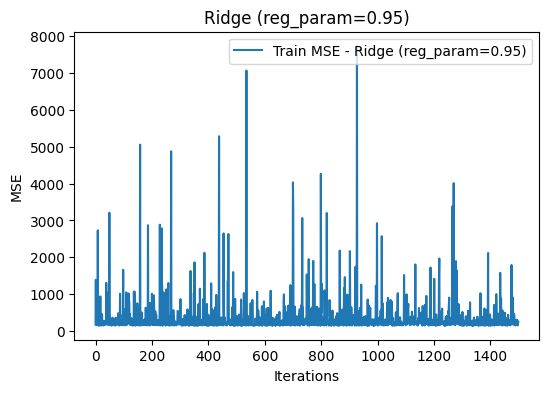

Final Test MSE (ridge (reg_param=0.95)): 226.9665
Final Test R² (ridge (reg_param=0.95)): 0.4745


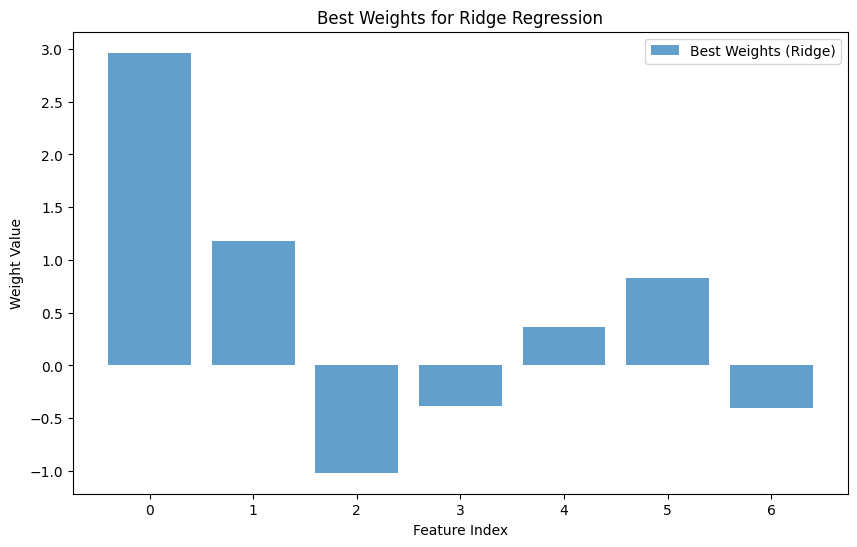


Training LASSO Regression Model...



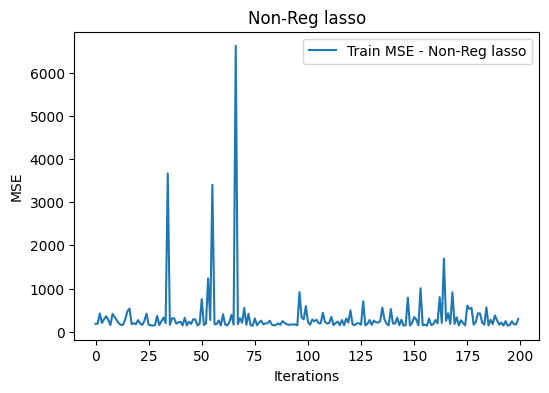

Final Test MSE (Non-Reg): 280.6021
Final Test R² (Non-Reg): 0.3503


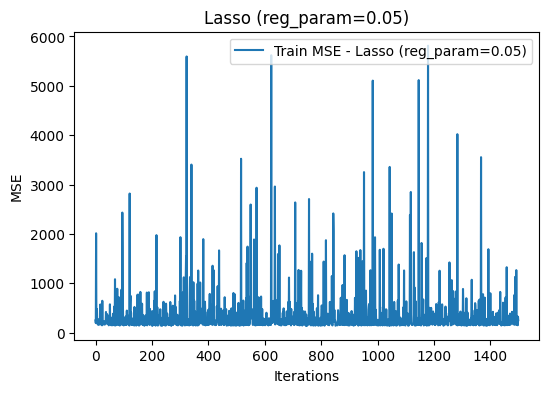

Final Test MSE (lasso (reg_param=0.05)): 228.5667
Final Test R² (lasso (reg_param=0.05)): 0.4708


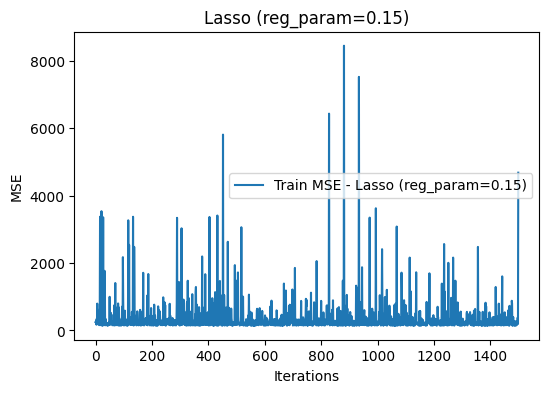

Final Test MSE (lasso (reg_param=0.15)): 4265.4150
Final Test R² (lasso (reg_param=0.15)): -8.8757


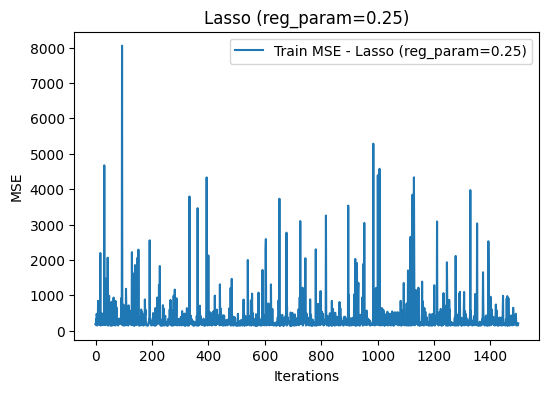

Final Test MSE (lasso (reg_param=0.25)): 179.2966
Final Test R² (lasso (reg_param=0.25)): 0.5849


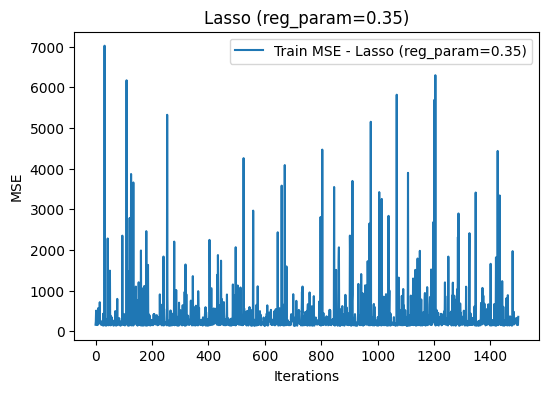

Final Test MSE (lasso (reg_param=0.35)): 338.0128
Final Test R² (lasso (reg_param=0.35)): 0.2174


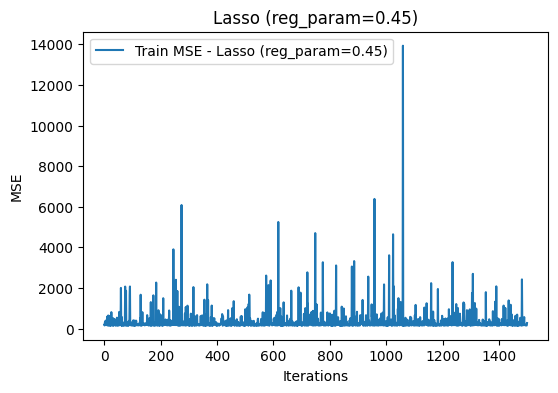

Final Test MSE (lasso (reg_param=0.45)): 243.7175
Final Test R² (lasso (reg_param=0.45)): 0.4357


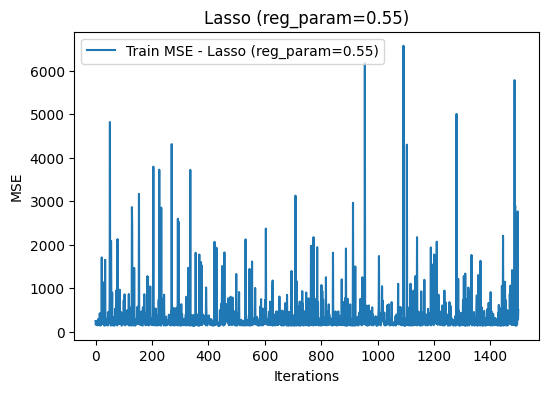

Final Test MSE (lasso (reg_param=0.55)): 442.5412
Final Test R² (lasso (reg_param=0.55)): -0.0246


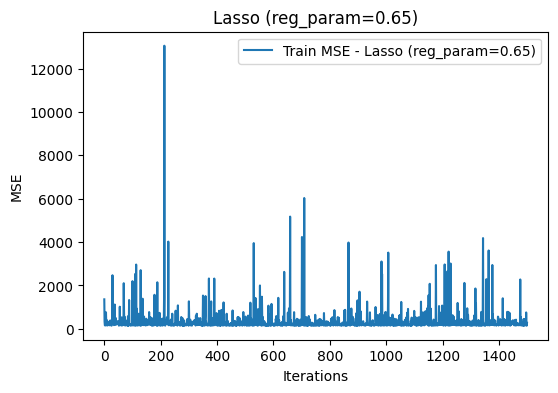

Final Test MSE (lasso (reg_param=0.65)): 254.3692
Final Test R² (lasso (reg_param=0.65)): 0.4111


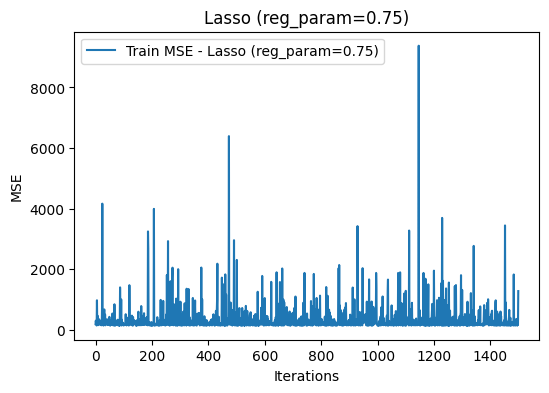

Final Test MSE (lasso (reg_param=0.75)): 1164.6837
Final Test R² (lasso (reg_param=0.75)): -1.6966


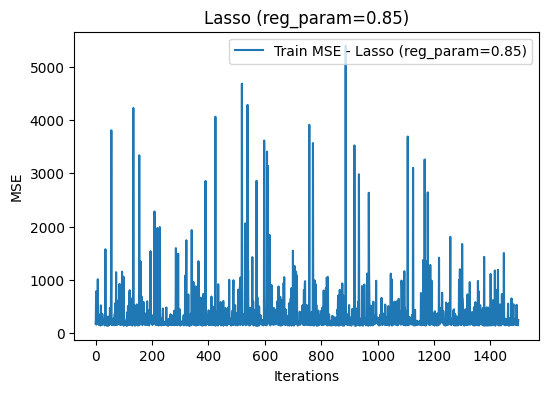

Final Test MSE (lasso (reg_param=0.85)): 230.1944
Final Test R² (lasso (reg_param=0.85)): 0.4670


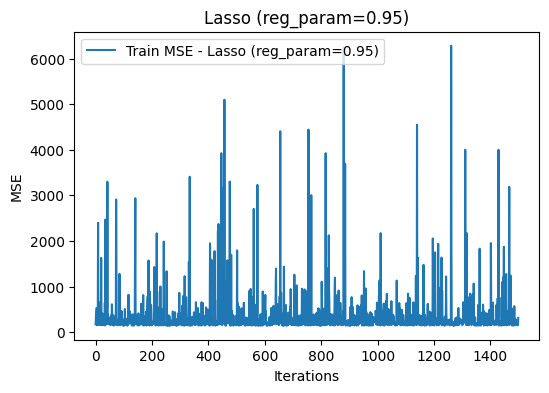

Final Test MSE (lasso (reg_param=0.95)): 296.5721
Final Test R² (lasso (reg_param=0.95)): 0.3133


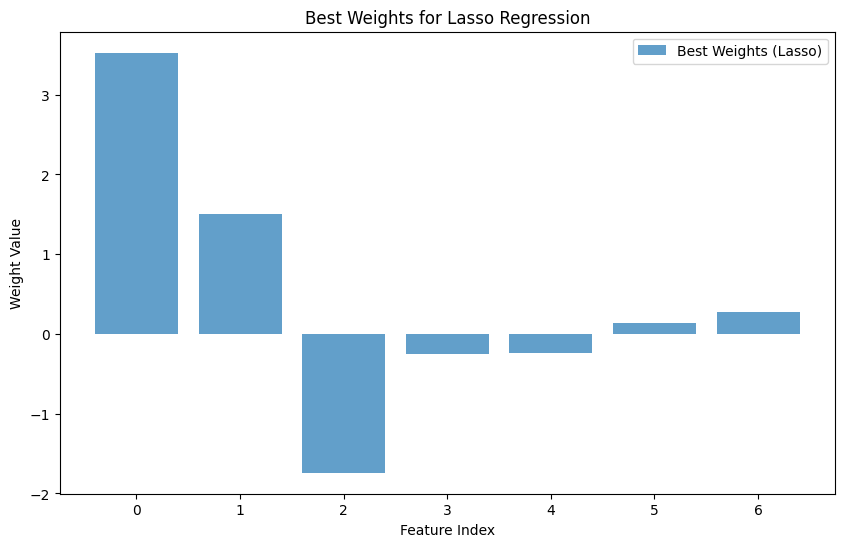

In [114]:
reg_params = np.arange(0.05, 1, 0.1)
learning_rate = 0.001
iterations = 200
init_method = 'random'

def plot_mse(train_mse, title):
    """Plots MSE for train sets."""
    plt.figure(figsize=(6, 4))
    plt.plot(train_mse, label=f'Train MSE - {title}')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.title(title)
    plt.show()

def evaluate_and_print(model, X_test, y_test, reg, reg_param=None):
    """Evaluates model and prints MSE and R² scores."""
    test_mse, test_r2 = model.evaluate(X_test, y_test)
    reg_info = f"{reg} (reg_param={round(reg_param,2)})" if reg_param else "Non-Reg"
    print(f"Final Test MSE ({reg_info}): {test_mse:.4f}")
    print(f"Final Test R² ({reg_info}): {test_r2:.4f}")
    return test_mse  # Return for later plotting

for reg in ['ridge', 'lasso']:
    print(f"\nTraining {reg.upper()} Regression Model...\n")

    # Non-Regularized Model
    lr_model_non_reg = LinearRegression(lr=learning_rate, iterations=iterations, init=init_method)
    train_mse_non_reg, val_mse_non_reg = lr_model_non_reg.fit_stochastic(X_train, y_train, X_val, y_val)
    
    plot_mse(train_mse_non_reg, f"Non-Reg {reg}")
    evaluate_and_print(lr_model_non_reg, X_test, y_test, reg)

    # Store MSE values for different reg_params
    reg_param_values = []
    test_mse_values = []

    # Regularized Model with varying reg_params
    best_weights = np.zeros(lr_model_non_reg.w.shape)
    lowest_mse = float('inf')
    for reg_param in reg_params:
        lr_model_reg = LinearRegression(lr=learning_rate, iterations=1500, init=init_method)
        train_mse_reg, val_mse_reg = lr_model_reg.fit_stochastic(X_train, y_train, X_val, y_val, regularization=reg, reg_param=reg_param)
        
        plot_mse(train_mse_reg, f"{reg.capitalize()} (reg_param={round(reg_param, 2)})")
        
        test_mse = evaluate_and_print(lr_model_reg, X_test, y_test, reg, reg_param)
        
        # Store values for final MSE vs reg_param plot
        reg_param_values.append(reg_param)
        test_mse_values.append(test_mse)
        if test_mse < lowest_mse:
            lowest_mse = test_mse
            best_weights = lr_model_reg.w

    # Plotting best weights for Ridge and Lasso
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(best_weights)), best_weights.flatten(), alpha=0.7, label=f'Best Weights ({reg.capitalize()})')
    plt.xlabel('Feature Index')
    plt.ylabel('Weight Value')
    plt.title(f'Best Weights for {reg.capitalize()} Regression')
    plt.legend()
    plt.show()

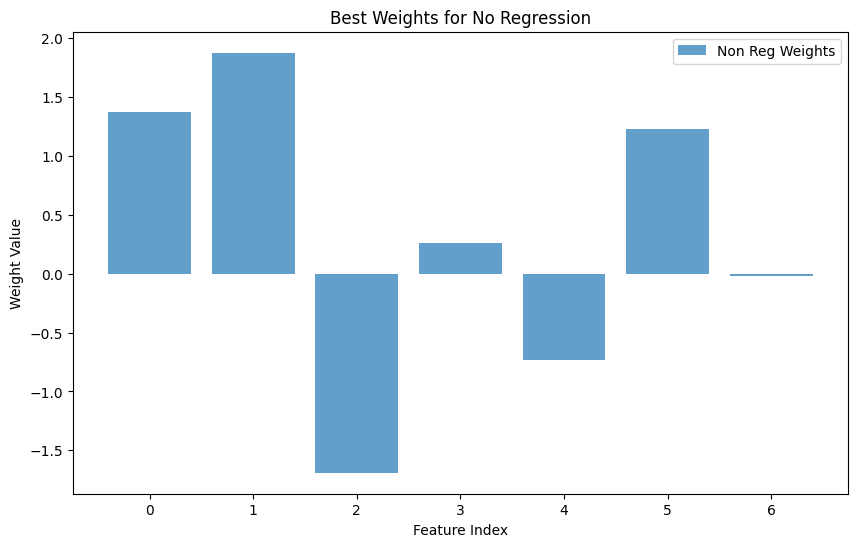

In [120]:
### Non Reg Weights plotting
weights = lr_model_non_reg.w
plt.figure(figsize=(10, 6))
plt.bar(range(len(weights)), weights.flatten(), alpha=0.7, label=f'Non Reg Weights')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title(f'Best Weights for No Regression')
plt.legend()
plt.show()